**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**September, 2023**


---

# Generation of plots used in Figure S6

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata

import seaborn as sns 

import matplotlib.pyplot as plt
import matplotlib as mpl



import gc

In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1


'/opt/conda/bin/python'

In [3]:
def Barplot(which_var, adata, var='identity', height=3, color = False, suffix= '', fig_format='svg'):
    
    '''
    Function to plot barplots plotting the proportion of cells per catergory in var, coming from each category in which_var.
    
    Parameters:
        which_var: column name in .obs. Contains the categories to contrast.
        adata: anndata object.
        var: column name in .obs. It contains the categories of the cells.
        height: plot height
        color: colors to use
        suffix: string. Suffix to be added at the end of the name of the plot.
    
    Return:
        Saves bar plot as a pdf.
        
    '''
    
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    ax1.set_xlim(0, 100)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+ suffix+'.'+fig_format, bbox_inches='tight',
                       dpi=300, orientation='landscape', format= fig_format, optimize=True)

# Loading data

In [15]:
adata= sc.read('../../data_integration_v2/results/scVI/snRNA5_scVIintegrated_latent30_TrophoblastsRaw_20230825_24h.h5ad')

Checking that the raw counts are still there

In [16]:
adata

AnnData object with n_obs × n_vars = 9059 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'assignment_SoC', 'donor_deconv', 'donor_souporcell', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi', 'cell_typeAll', 'stage_perInfection', 'celltype_predictions', 'probabilities', 'cell_type', 'celltype-Stage', 'donor_stage'
    var: 'gene_ids', 'feature_types', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'cell_typeAll_colors', 'cell_type_colors', 'celltype_predictions_colors', 'donor_id_colors', 'hpi_colors', 'hvg', 'infection_colors', 'is_doublet_colors', 'leiden', 'leiden_scvi_colors', 'neighbors', 'phase_colors', 'sample_colors', 'stage_perInfectio

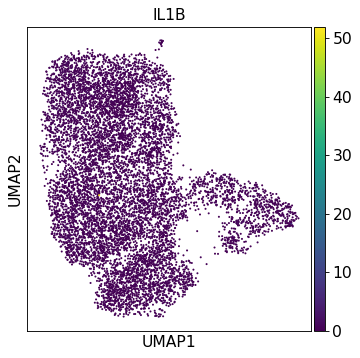

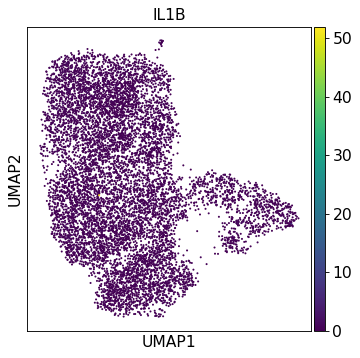

In [17]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['IL1B' ],legend_fontsize='xx-small', layer='raw_counts')
sc.pl.umap(adata, color=['IL1B' ],legend_fontsize='xx-small',use_raw=False)

In [18]:
gc.collect()

10253

# Supplementary Figure S6 - snRNAseq: UMAP

In [22]:
#DF with the row names as the identity of the cells
colors_final_df = pd.DataFrame(index = np.unique(adata.obs['cell_type']))


#Assign each color per cell type under the column color

colors_final_df.loc['SCT', 'color'] = '#f779a3'
colors_final_df.loc['VCT', 'color'] = '#b27ab4'
colors_final_df.loc['VCT_fusing', 'color'] = '#b53179'
colors_final_df.loc['VCT_p', 'color'] = '#993f98'
colors_final_df.loc['VCT_CCC', 'color'] = '#e2a7c8'

colors_final_df.loc['iEVT', 'color'] = '#0069b4'
colors_final_df.loc['EVT_1', 'color'] = '#009999'
colors_final_df.loc['EVT_2', 'color'] = '#03f9f2'

colors_final_dict= colors_final_df.to_dict()['color']

In [23]:
sc.set_figure_params(figsize=(5,5))

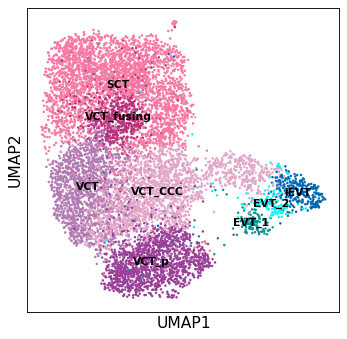

In [24]:
sc.pl.umap(adata, color=['cell_type'], size=20,
            palette= colors_final_dict, title='', legend_loc='on data',legend_fontsize='x-small',
           save='_ExpAll_snRNA.svg')

### Normalise genes

In [25]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


# Supplementary Figure S6 - snRNAseq UMAP: Uninfected vs Pf

## Plasmodium

In [26]:
temp_cells = adata[adata.obs['stage_perInfection'].isin(['Pf_24h','UI_Pf_24h'])]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [27]:
#DF with the row names as the identity of the cells
colors_df = pd.DataFrame(index = np.unique(adata.obs['cell_type']))


#Assign each color per cell type under the column color
colors_df.loc['Pf_24h', 'color'] = '#e5d400'
colors_df.loc['UI_Pf_24h', 'color'] = '#191919'

colors_dict= colors_df.to_dict()['color']

Trying to set attribute `.uns` of view, copying.


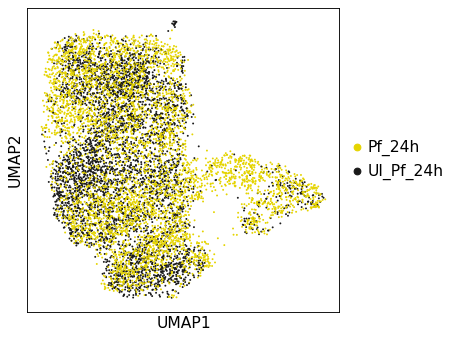

In [28]:
sc.pl.umap(temp_cells, color=['stage_perInfection'], size=12,
           palette=colors_dict, title='', legend_fontsize='medium', 
           save='_ExpAll_PfvsUI_snRNA.svg')

In [17]:
gc.collect()

4819

In [25]:
del(temp_cells)
gc.collect()

3165

# Supplementary Figure S6 - snRNAseq UMAP: metadata

In [29]:
sc.set_figure_params(figsize=(5,5))

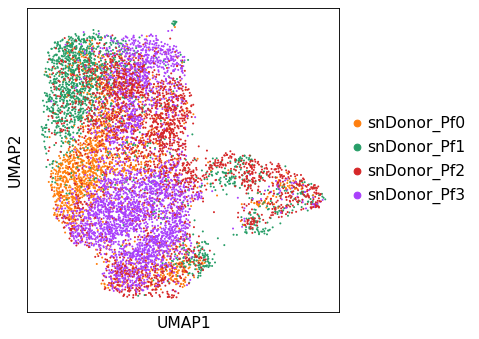

In [30]:
sc.pl.umap(adata, color=['donor_id'], size=13,
        title='', legend_fontsize='medium', 
           save='_ExpAll_donor_snRNA.svg')

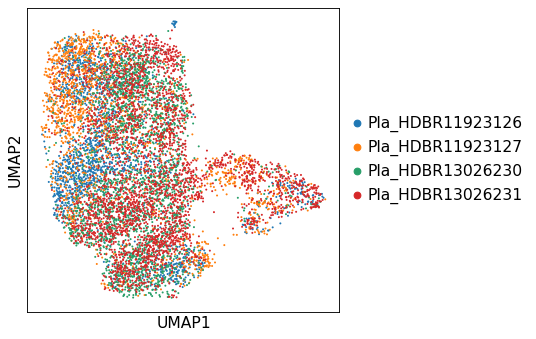

In [31]:
sc.pl.umap(adata, color=['sample'], size=13,
        title='', legend_fontsize='medium', 
           save='_ExpAll_sample_snRNA.svg')

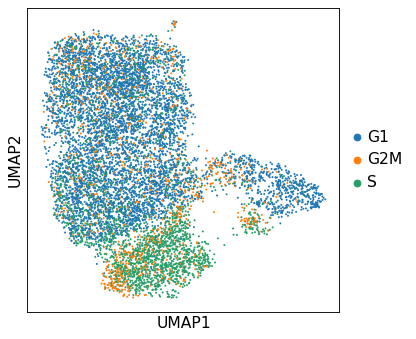

In [32]:
sc.pl.umap(adata, color=['phase'], size=13,
        title='', legend_fontsize='medium', 
           save='_ExpAll_CellCycle_snRNA.svg')

## Supplementary Figure S6 - snRNAseq UMAP: Logistic regression

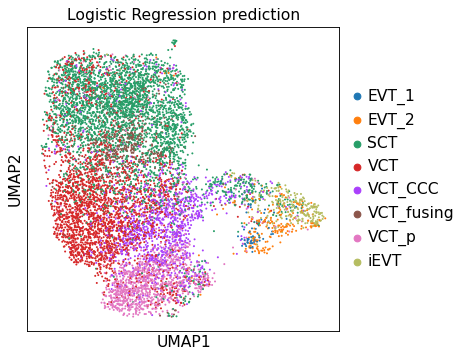

In [33]:
sc.pl.umap(adata, color=['celltype_predictions'], size=13,
        title='Logistic Regression prediction', legend_fontsize='medium', 
           save='_ExpAll_logRegPrediction_snRNA.svg')

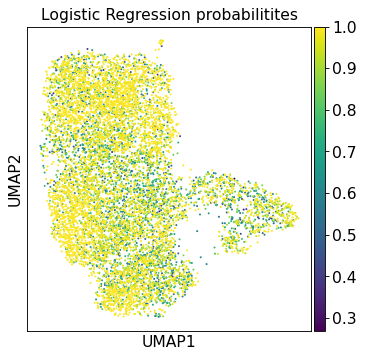

In [34]:
sc.pl.umap(adata, color=['probabilities'], size=13,
        title='Logistic Regression probabilitites', legend_fontsize='medium', 
           save='_ExpAll_probabilities_snRNA.svg')

## Supplementary Figure S6 - snRNAseq UMAP: Marker genes

In [65]:
#adata.X=adata.layers['raw_counts'].copy()
gc.collect()

11218

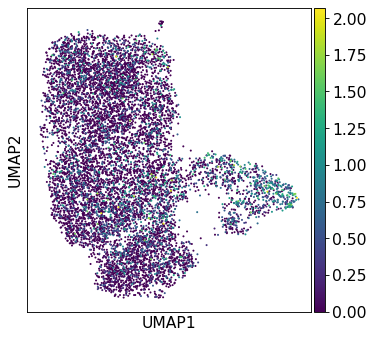

In [37]:
sc.pl.umap(adata, color=['CD9'],
        title='', legend_fontsize='medium')

In [38]:
adata.obs['cell_type'].cat.reorder_categories(['SCT','VCT_fusing','VCT','VCT_p','VCT_CCC','EVT_1', 'EVT_2', 'iEVT']
                                                    , inplace = True)

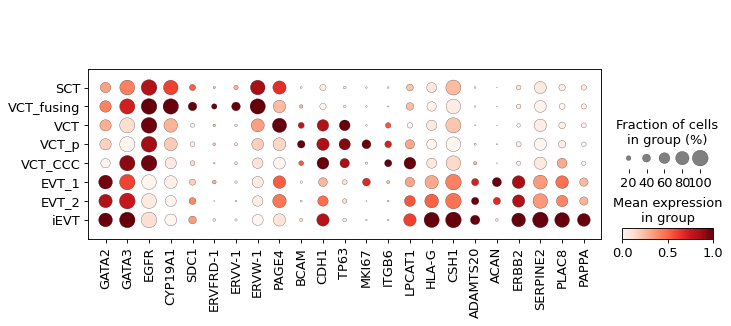

In [39]:
marker_genes_List = [
    'GATA2','GATA3','EGFR',
    'CYP19A1','SDC1',
    'ERVFRD-1','ERVV-1','ERVW-1',
    'PAGE4','BCAM','CDH1','TP63',
    'MKI67',
    'ITGB6','LPCAT1',
    
    
    "HLA-G", 'CSH1',
    'ADAMTS20','ACAN',
    'ERBB2','SERPINE2',
    'PLAC8','PAPPA',]



sc.pl.dotplot(adata, marker_genes_List, groupby='cell_type', use_raw=False, standard_scale = 'var',
             save='ExpAll_snRNAseq_markerGenes.svg')